In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
test_path="dataset/test_set"
train_path="dataset/training_set"

In [4]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [5]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_path,
                                                   target_size = (128, 128),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary',
                                                   shuffle=True,
                                                   save_to_dir=None)

testing_data = data_generator.flow_from_directory(directory = test_path,
                                                  target_size = (128, 128),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))

model.add(Dense(units = 1, activation = 'sigmoid'))

c:\Users\exizo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
fitted_model = model.fit(training_data,
                        epochs = 50,
                        validation_data = testing_data)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 284ms/step - accuracy: 0.8691 - loss: 0.3043 - val_accuracy: 0.8100 - val_loss: 0.4675
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 288ms/step - accuracy: 0.8841 - loss: 0.2844 - val_accuracy: 0.8205 - val_loss: 0.4314
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 292ms/step - accuracy: 0.8906 - loss: 0.2653 - val_accuracy: 0.8290 - val_loss: 0.4018
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 280ms/step - accuracy: 0.8851 - loss: 0.2736 - val_accuracy: 0.8375 - val_loss: 0.4021
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 292ms/step - accuracy: 0.8867 - loss: 0.2690 - val_accuracy: 0.8285 - val_loss: 0.4307
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 300ms/step - accuracy: 0.9000 - loss: 0.2594 - val_accuracy: 0.8165 - val_loss: 0.4208
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 284ms/step - accuracy: 0.8967 - loss: 0.2539 - val_accuracy: 0.8255 - val_loss: 0.4330
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 287ms/step - accuracy: 0.8981 - loss: 0

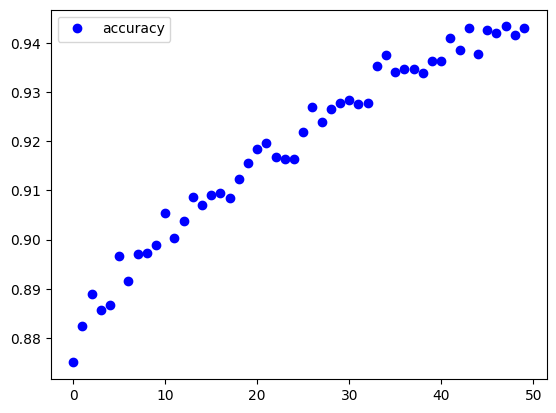

In [31]:
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), 
         accuracy, 
         'bo', 
         label = 'accuracy')

plt.legend()

In [32]:
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size=(128, 128))
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()
    
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(x=test_image)
    
    print(result)

    if result[0][0] == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

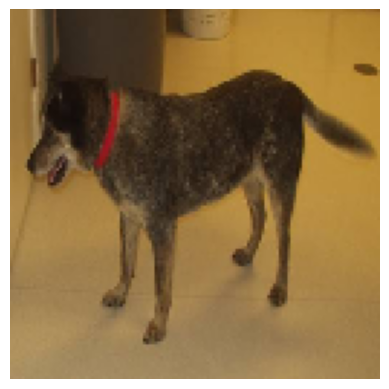

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.]]
Dog


In [70]:
print(testing_image(test_path + '/dogs/dog.4448.jpg'))